# Quantum Adder and Incrementer circuits

Paper: "A CLASS OF EFFICIENT QUANTUM INCREMENTER GATES FOR QUANTUM CIRCUIT SYNTHESIS", by Li et al, International Journal of Modern Physics B Vol. 28, No. 1 (2014) 1350191

Link: https://www.worldscientific.com/doi/abs/10.1142/S0217979213501919

Notebook by: Óscar Amaro (2023)

In [4]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, IBMQ, Aer, QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

### 3-qubit quantum incrementer

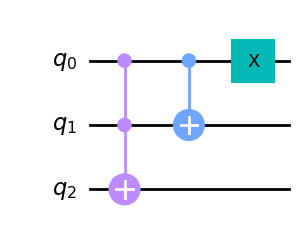

In [5]:
qreg_q = QuantumRegister(3, 'q')
circuit = QuantumCircuit(qreg_q)
circuit.ccx(qreg_q[0],qreg_q[1],qreg_q[2])
circuit.cx(qreg_q[0],qreg_q[1])
circuit.x(qreg_q[0])
circuit.draw("mpl")

In [6]:
backend = Aer.get_backend('unitary_simulator')
job = qiskit.execute(circuit, backend, shots=1)
result = job.result()
circuitU = result.get_unitary(circuit,3)
print(np.real(circuitU))

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


### 3-qubit quantum decrementer

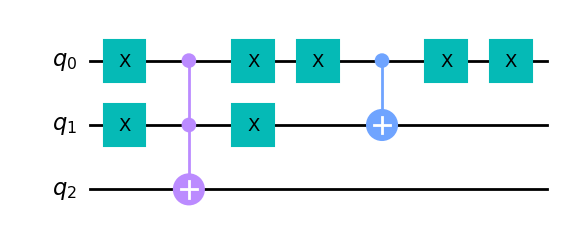

In [7]:
# this circuit can of course be simplified considering the consecutive X gates
qreg_q = QuantumRegister(3, 'q')
circuit = QuantumCircuit(qreg_q)
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.ccx(qreg_q[0],qreg_q[1],qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0],qreg_q[1])
circuit.x(qreg_q[0])
circuit.x(qreg_q[0])
circuit.draw("mpl")

In [8]:
backend = Aer.get_backend('unitary_simulator')
job = qiskit.execute(circuit, backend, shots=1)
result = job.result()
circuitU = result.get_unitary(circuit,3)
print(np.real(circuitU))

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy==1.23.5
qiskit==0.25.1
